In [ ]:
### NOTE: this notebook is from https://machinelearningcoban.com/2017/04/09/smv/

In [1]:
import numpy as np 
import matplotlib.pyplot as plt

# Compute distance between each pair of the two collections of inputs
from scipy.spatial.distance import cdist
np.random.seed(1)

In [2]:
means = [[1, 1], [5, 4]]
cov = [[.5, .3], [.3, .5]]
N = 20
X0 = np.random.multivariate_normal(means[0], cov, N)
X1 = np.random.multivariate_normal(means[1], cov, N)
X = np.vstack((X0, X1)).T
y = np.hstack((np.ones((1, N)), -1*np.ones((1, N))))

In [3]:
print(X0.shape, X1.shape, X.shape, y.shape)

(20, 2) (20, 2) (2, 40) (1, 40)


### SVM Primal problem:
$$\begin{array}{c}
\min _{w, b} \frac{1}{2}|| w||^{2} \\
y_{i}\left(w^\top x_{i}+b\right) \geq 1\; \forall i
\end{array}$$


### Lagrangian:
$$\mathcal{L}(w, b, \alpha)=\frac{1}{2} \Vert w \Vert ^{2}-\sum_{i} \alpha_{i}\left[y_{i}\left(w^\top x_{i}+b\right)-1\right]$$
where $\alpha_i \geq 0$ is the Lagrangian multiplier.


### Lagrange dual function:
$$g(\alpha) = \sum_i \alpha_i - \frac{1}{2}\sum_{ij} \alpha_i \alpha_j y_i y_j x_i^\top x_j$$
with $\sum_i \alpha_i y_i = 0 \text{,}\space \alpha_i \geq 0$.


Let:

$\mathbf{V}=\left[y_{1} x_{1}, y_{2} x_{2}, \ldots, y_{N} x_{N}\right]$,

$\mathbf{1}=[1,1, \ldots, 1]^\top$,

$\mathbf{K} = \mathbf{V}^\top \mathbf{V}$,

$$\Rightarrow g(\alpha)=-\frac{1}{2} \alpha^\top \mathbf{K} \alpha+\mathbf{1}^\top \alpha$$



In [4]:
from cvxopt import matrix, solvers

In [5]:
#solving the problem

# build V
# your code is here 
V = X * y
##########

# your code is here
K = matrix(V.T @ V)
##########

p = matrix(-np.ones((2*N, 1))) # all-one vector 
# build A, b, G, h 
G = matrix(-np.eye(2*N)) # for all lambda_n >= 0
h = matrix(np.zeros((2*N, 1)))
A = matrix(y) # the equality constrain is actually y^T lambda = 0
b = matrix(np.zeros((1, 1))) 


solvers.options['show_progress'] = True
sol = solvers.qp(K, p, G, h, A, b)

alpha = np.array(sol['x'])

     pcost       dcost       gap    pres   dres
 0: -3.0581e+00 -5.0305e+00  9e+01  9e+00  2e+00
 1: -1.3618e+00 -9.3920e-01  9e+00  9e-01  2e-01
 2: -1.9698e-01 -5.8853e-01  7e-01  4e-02  6e-03
 3: -2.5915e-01 -3.5302e-01  1e-01  3e-03  6e-04
 4: -3.1291e-01 -3.3716e-01  2e-02  5e-05  9e-06
 5: -3.2996e-01 -3.3092e-01  1e-03  1e-06  2e-07
 6: -3.3079e-01 -3.3082e-01  2e-05  1e-08  2e-09
 7: -3.3081e-01 -3.3081e-01  1e-06  1e-10  2e-11
 8: -3.3081e-01 -3.3081e-01  4e-08  1e-12  2e-13
Optimal solution found.


Support vectors are positive solutions ($\alpha > 0$) of the Lagrange dual function.

$w$ and $b$ can be calculated from support vector set $\mathcal{S}$:

$$w=\sum_{m \in \mathcal{S}} \alpha_{m} y_{m} x_{m}$$

$$b=\frac{1}{N_{\mathcal{S}}} \sum_{n \in \mathcal{S}}\left(y_{n}-w^\top x_{n}\right)$$
where  $N_{\mathcal{S}}$ is the number of support vectors.


In [6]:
# Finding support vector
epsilon = 1e-5 # just a small number, greater than 1e-9
S = np.where(alpha > epsilon)[0]
alphaS = alpha[S]

In [7]:
alphaS

array([[3.30813550e-01],
       [1.43593234e-05],
       [3.30799231e-01]])

In [8]:
VS = V[:, S]
XS = X[:, S]
yS = y[:, S]
# calculate w and b
### your code is here
w = VS @ alphaS
b = np.mean(yS.T - w.T @ XS)
###########


print('w = ', w.T)
print('b = ', b)

w =  [[-0.80281855 -0.13080407]]
b =  2.544412038885632


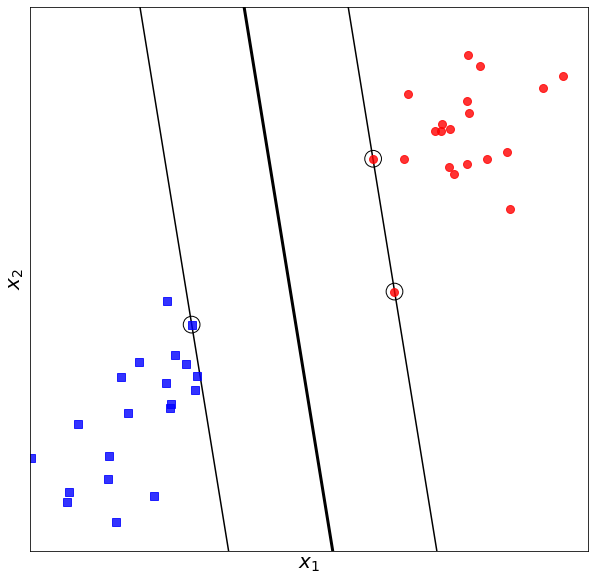

In [9]:
def plot(w, b, X0, X1, X, S):
  fig, ax = plt.subplots(figsize=(10,10))
  x1 = np.arange(-10, 10, 0.1)
  y1 = -w[0, 0]/w[1, 0]*x1 - b/w[1, 0]
  y2 = -w[0, 0]/w[1, 0]*x1 - (b-1)/w[1, 0]
  y3 = -w[0, 0]/w[1, 0]*x1 - (b+1)/w[1, 0]
  plt.plot(x1, y1, 'k', linewidth = 3)
  plt.plot(x1, y2, 'k')
  plt.plot(x1, y3, 'k')


  # y4 = 10*x1
  # plt.plot(x1, y1, 'k')
  # plt.fill_between(x1, y1, color='red', alpha=0.1)
  # plt.fill_between(x1, y1, y4, color = 'blue', alpha = .1)


  plt.plot(X0[:, 0], X0[:, 1], 'bs', markersize = 8, alpha = .8)
  plt.plot(X1[:, 0], X1[:, 1], 'ro', markersize = 8, alpha = .8)

  plt.axis('equal')
  plt.ylim(np.min(X[1, :])*1.05, np.max(X[1, :])*1.05)
  plt.xlim(np.min(X[0, :])*1.05, np.max(X[0, :])*1.05)

  # hide tikcs 
  cur_axes = plt.gca()
  cur_axes.axes.get_xaxis().set_ticks([])
  cur_axes.axes.get_yaxis().set_ticks([])

  # add circles around support vectors 
  for m in S:
      circle = plt.Circle((X[0, m], X[1, m] ), 0.1, color='k', fill = False)
      ax.add_artist(circle)


  plt.xlabel('$x_1$', fontsize = 20)
  plt.ylabel('$x_2$', fontsize = 20)
  plt.show()
plot(w, b, X0, X1, X, S)